##  Statistical Tests

## Z-Test (2_Tailed)

### $$ H0:\mu = \mu0\  Vs \ H1:\mu \not=\mu0 $$<br>

<h4>$$ Here Given, \mu = 1.756 \ and \  \sigma=0.1 $$ </h4>

In [55]:
import numpy as np

In [56]:
x= [ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87] # data

In [57]:
xbar = np.mean(x)

mu0 = 1.756 # Its Given 
sigma= 0.1 #Lets say known value

sd = np.std(x,ddof=1) # sample standard deviation ddof is set to 1 for unbiased estimator for variance
n = len(x)

z_cal = (xbar-mu0)/(sigma/np.sqrt(n))

print(z_cal) 

 

1.8973665961010293


In [58]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

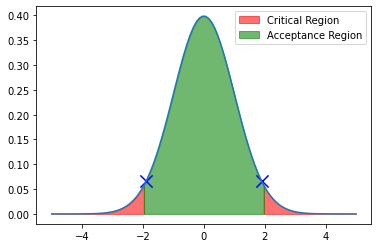

In [59]:
x_axis = np.linspace(-5,5,100)
fig = plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1))
#plt.scatter(-1.96,stats.norm.pdf(-1.96, 0, 1))
#plt.scatter(1.96,stats.norm.pdf(1.96, 0, 1))
#plt.fill_between([x_axis<-1.96],0,stats.t.pdf([x_axis<-1.96],n-1),alpha=.99,label='alpha/2',color='g')

#Caclulating the left end of the test for alpha/2
left_tail_x = []
for i in range(0, len(x_axis)):
    if(x_axis[i] <= -1.96):
            left_tail_x.append(x_axis[i])
left_tail_y = []
for i in range(0,len(left_tail_x)):
    left_tail_y.append(stats.norm.pdf(left_tail_x[i]))
plt.fill_between(left_tail_x,left_tail_y,alpha=.56,label='Critical Region',color='r')


#Caclulating the right end of the test for alpha/2
right_tail_x = []
for i in range(0, len(x_axis)):
    if(x_axis[i] >= 1.96):
            right_tail_x.append(x_axis[i])
right_tail_y = []
for i in range(0,len(right_tail_x)):
    right_tail_y.append(stats.norm.pdf(right_tail_x[i]))
plt.fill_between(right_tail_x,right_tail_y,alpha=.56,color='r')


#Calculating for the space for 1 - alpha
middle_x = []
for i in range(0, len(x_axis)):
    if(x_axis[i]<=1.97 and x_axis[i]>=-1.97):
            middle_x.append(x_axis[i])
middle_y = []
for i in range(0,len(middle_x)):
    middle_y.append(stats.norm.pdf(middle_x[i]))
plt.fill_between(middle_x,middle_y,alpha=.56,color='g',label='Acceptance Region')    
    


plt.scatter(z_cal,stats.norm.pdf(z_cal, 0, 1),c="b",marker='x',s=150)
plt.scatter(-z_cal,stats.norm.pdf(-z_cal, 0, 1),c="b",marker='x',s=150)



plt.legend()
plt.show()


### As We Can See in the above Graph that the Zcal Value is in the Accepatance Region! i.e The Hypothesis is not rejected!

# t-Test

In [60]:
import numpy as np

In [61]:
x= [ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87] # data

In [62]:
xbar = np.mean(x)

mu0 = 1.75 # hypothesis
sd = np.std(x,ddof=1) # sample standard deviation ddof is set to 1 for unbiased estimator for variance
n = len(x)

t_cal = (xbar-mu0)/(sd/np.sqrt(n))

print(t_cal)

2.3968766311585883


We should observe 'p'-value to observe a value t more extreme than the observed one t-cal in NULL Hypothesis. H0: P(t>t_cal|H0)

In [63]:
import scipy.stats as stats
import matplotlib.pyplot as plt

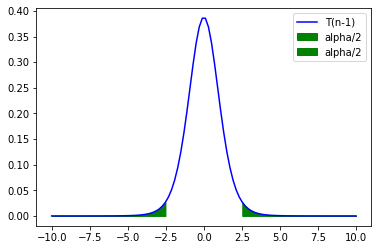

In [64]:
t_values = np.linspace(-10,10,100)
plt.plot(t_values,stats.t.pdf(t_values,n-1),'b-',label='T(n-1)')
upper_tval_tvalues = t_values[t_values > t_cal]
lower_tval_tvalues = t_values[t_values < -t_cal]
        
plt.fill_between(lower_tval_tvalues,0,stats.t.pdf(lower_tval_tvalues,n-1),alpha=.99,label='alpha/2',color='g')
plt.fill_between(upper_tval_tvalues,0,stats.t.pdf(upper_tval_tvalues,n-1),alpha=.99,label='alpha/2',color='g')


plt.legend()
plt.show()

## Testing Pairwise Associations

<h4>1.Pearson correlation test: test association between two quantitative variables</h4>
<br>
Testing the Correlation between 2 Quantitative Variables 
Let X and Y be 2 Quantitative variables where n samples are observed 

In [65]:
n = 50
x= np.random.normal(size = n)
y = 2*x + np.random.normal(size = n)
cor,pval = stats.pearsonr(x,y)
print("Correlation value:",cor)
print("p-value:",pval)

Correlation value: 0.8915239519024443
p-value: 3.964661569049908e-18


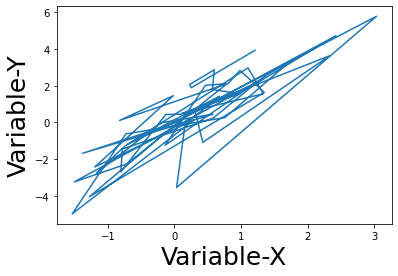

In [66]:
plt.plot(x,y)
plt.xlabel('Variable-X',size=25)
plt.ylabel('Variable-Y',size=25)
plt.show()

### 2.Two sample (Student) 𝑡-test: compare two means

1. Model the Data
Assume that the two random variables are normally distributed: 𝑥 ∼ 𝒩 (𝜇𝑥, 𝜎𝑥), 𝑦 ∼ 𝒩 (𝜇𝑦, 𝜎𝑦).
2. Fit: estimate the model parameters
Estimate means and variances
3. T-Test 
<br>
    1.If both variances are known:
    <br>
    2.If both variances are unknown and equal

In [67]:
import scipy.stats as stats
import numpy as np

height = np.array([1.83,1.83,1.73,1.82,1.83,1.73,1.99,1.85,1.68,1.87,1.66,1.71,1.73,1.64,1.70,1.60,1.79,1.73,1.62,1.77])
grp = np.array(["M"]*10 + ["F"]*10)

print(stats.ttest_ind(height[grp=="M"],height[grp=="F"],equal_var=True))

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)


## Chi-Square Test: $ \chi^2 $

The example is of 15 patients with cancer, two observed categorical variables:Canalar Tumor (Y/N) and metastasis (Y/N). $\chi^2$ tests asssociated between those 2 variables

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Dataset
# 15 samples
# 10 first with canalar tumor , 5 last without
canalar_tumor = np.array([1]*10 + [0]*5)
# 8 first with metastasis, 6 without, the last with
meta = np.array([1]*8 + [0]*6 + [1])

crosstab = pd.crosstab(canalar_tumor,meta,rownames=['canalar_tumor'],colnames=['meta'])
print("Observed table:")
print("--------------")
print(crosstab)

chi2,pval,dof,expected = stats.chi2_contingency(crosstab)
print("Statistics")
print("----------")
print("Chi2 = %f, pval = %f" % (chi2,pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
--------------
meta           0  1
canalar_tumor      
0              4  1
1              2  8
Statistics
----------
Chi2 = 2.812500, pval = 0.093533
Expected table:
---------------
[[2. 3.]
 [4. 6.]]


### Computing expected cross-table 

In [69]:
meta_marg = crosstab.sum(axis=0)
meta_freq = meta_marg / meta_marg.sum()

canalar_tumor_marg = crosstab.sum(axis=1)
canalar_tumor_freq = canalar_tumor_marg / canalar_tumor_marg.sum()

print('Canalar tumor frequency? Yes: %.2f' % canalar_tumor_freq[0], 'No: %.2f' %canalar_tumor_freq[1])

print('Metastasis frequency? Yes: %.2f' % meta_freq[0], 'No: %.2f' % meta_freq[1])


print('Expected frequencies:')
print(np.outer(canalar_tumor_freq, meta_freq))

print('Expected cross-table (frequencies * N): ')
print(np.outer(canalar_tumor_freq, meta_freq) * len(canalar_tumor))

Canalar tumor frequency? Yes: 0.33 No: 0.67
Metastasis frequency? Yes: 0.40 No: 0.60
Expected frequencies:
[[0.13333333 0.2       ]
 [0.26666667 0.4       ]]
Expected cross-table (frequencies * N): 
[[2. 3.]
 [4. 6.]]
